In [3]:
import numpy as np
import pandas as pd
import sklearn
import nltk
import datetime

train_df = pd.read_csv("sales_train.csv")
test_df = pd.read_csv("test.csv")
items_df = pd.read_csv("items.csv")
item_categories_df = pd.read_csv("item_categories.csv")
shops_df = pd.read_csv("shops.csv")

#Prophet
ts=train_df
ts=train_df.groupby(["date_block_num"])["item_cnt_day"].sum()

ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
ts=ts.reset_index()
ts.head()

from fbprophet import Prophet

ts.columns=['ds','y']

model = Prophet(yearly_seasonality = True)
model.fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 2, freq = 'MS')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat']].tail()

,ds,yhat
31,2015-08-01,68255.356226
32,2015-09-01,70408.960116
33,2015-10-01,71379.147269
34,2015-11-01,83193.957240
35,2015-12-01,125513.062950


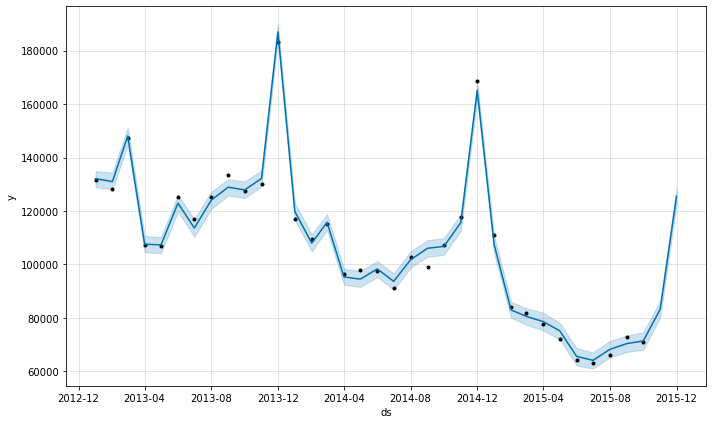

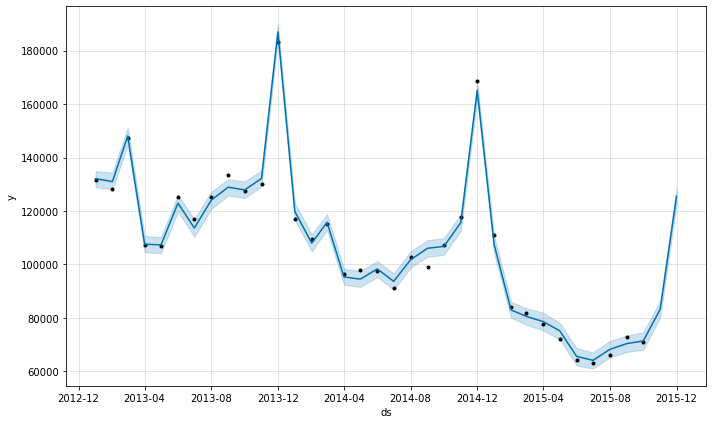

In [5]:
model.plot(forecast)